In [2]:
import pandas as pd
from collections import Counter

fold_labels = ['label_fold' + str(i) for i in range(1, 11)]
majority_labels = ['majority_label_' + str(i) for i in range(1, 11)]
#df = pd.read_csv('drive/MyDrive/zeit.predicted.vanilla.allfolds.tsv', sep='\t')
df = pd.read_csv('drive/MyDrive/bootstrapped_majority_labels_with_details.tsv', sep='\t')
#df = pd.read_csv('output_aggregated_labels_fic.csv', sep='\t')
#df = pd.read_csv('output_aggregated_labels.csv', sep='\t')
df_folds = df[fold_labels]
df_folds

,label_fold1,label_fold2,label_fold3,label_fold4,label_fold5,label_fold6,label_fold7,label_fold8,label_fold9,label_fold10
0,a,a,a,d,a,a,a,a,a,a
1,a,a,a,d,a,a,a,a,a,b
2,b,b,b,b,b,b,b,b,b,b
3,b,b,b,b,b,b,b,b,b,b
4,d,d,d,d,d,d,b,d,b,d
...,...,...,...,...,...,...,...,...,...,...
7982,d,d,d,c,b,d,d,b,b,b
7983,b,b,b,b,b,b,b,d,b,b
7984,b,d,d,d,d,d,d,d,d,d
7985,b,b,b,b,b,b,b,b,b,b


In [3]:
df_majority = df[majority_labels]
majority_10 = df['majority_label_10']
majority_10
df_majority

,majority_label_1,majority_label_2,majority_label_3,majority_label_4,majority_label_5,majority_label_6,majority_label_7,majority_label_8,majority_label_9,majority_label_10
0,a,a,a,a,a,a,a,a,a,a
1,a,a,a,a,a,a,a,a,a,a
2,b,b,b,b,b,b,b,b,b,b
3,b,b,b,b,b,b,b,b,b,b
4,d,d,d,d,d,d,d,d,d,d
...,...,...,...,...,...,...,...,...,...,...
7982,d,d,d,d,d,d,d,d,d,d
7983,b,b,b,b,b,b,b,b,b,b
7984,d,d,d,d,d,d,d,d,d,d
7985,b,b,b,b,b,b,b,b,b,b


In [4]:
def get_decade(year):
    if year < 0:
        raise ValueError("Year must be a positive integer")

    decade = (year // 10) * 10
    return decade

paths = df['path']
years = [path.split('/')[1] for path in paths]
decades = [get_decade(int(year)) for year in years]


In [5]:
# Access each row as a list
labels = []
for row, majority, maj_10, decade in zip(df_folds.values,df_majority.values,majority_10,decades):
    row_list = list(row)
    cnt = Counter(row_list)
    majcnt = Counter(majority)
    simple_majority = cnt.most_common(1)[0][0]
    sample_majority = majcnt.most_common(1)[0][0]
    print(decade,row_list,simple_majority,sample_majority,maj_10, simple_majority == sample_majority, simple_majority == maj_10, cnt, majcnt)
    #majority = cnt.most_common(1)[0][0]
    #labels.append(majority)
    #print(decade,majority)

Streaming output truncated to the last 5000 lines.
1960 ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'] b b b True True Counter({'b': 10}) Counter({'b': 10})
2000 ['d', 'c', 'd', 'd', 'b', 'd', 'd', 'c', 'd', 'd'] d d d True True Counter({'d': 7, 'c': 2, 'b': 1}) Counter({'d': 10})
2000 ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'd'] b b b True True Counter({'b': 9, 'd': 1}) Counter({'b': 10})
1990 ['d', 'd', 'd', 'd', 'b', 'd', 'd', 'd', 'b', 'd'] d d d True True Counter({'d': 8, 'b': 2}) Counter({'d': 10})
1980 ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'] b b b True True Counter({'b': 10}) Counter({'b': 10})
1980 ['b', 'b', 'd', 'd', 'd', 'c', 'b', 'd', 'c', 'c'] d d d True True Counter({'d': 4, 'b': 3, 'c': 3}) Counter({'d': 10})
2000 ['d', 'd', 'b', 'd', 'b', 'b', 'd', 'd', 'b', 'b'] d d b True False Counter({'d': 5, 'b': 5}) Counter({'d': 7, 'b': 3})
1980 ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'd'] b b b True True Counter({'b': 9, 'd': 1}) Counter({'b': 10})
198

In [6]:
import statistics

def calculate_mean_and_stddev(data):
    mean_value = statistics.mean(data)
    stddev_value = statistics.stdev(data)
    return mean_value, stddev_value


m10_overview = {}
for fold_label in fold_labels:
  m10_decade_distr = {}
  for m10, d in zip(list(majority_10), decades):
    if d not in m10_decade_distr:
      m10_decade_distr[d] = Counter()
    m10_decade_distr[d][m10] += 1
  for decade, decade_distr in m10_decade_distr.items():
    sumlabels = sum(decade_distr.values())
    for label, count in decade_distr.items():
      decade_distr[label] = count / sumlabels
    #print(decade,decade_distr)
  m10_overview[fold_label] = m10_decade_distr

m10_decades_labels = []
m10_labels = []
m10_mean_heights = []
m10_std_devs = []

print(m10_overview)
decade_labels = sorted(set(decades))
print(decade_labels)
for decade in decade_labels:
    for label in ['a', 'b', 'c', 'd']:
        label_distr = []
        for fold_label in fold_labels:
            label_distr.append(m10_overview[fold_label][decade][label])
        mean, stddev = calculate_mean_and_stddev(label_distr)
        m10_decades_labels.append(decade)
        m10_labels.append(label)
        m10_mean_heights.append(mean)
        m10_std_devs.append(stddev)
        print(decade, label, mean, stddev)


{'label_fold1': {1980: Counter({'b': 0.6966205837173579, 'd': 0.2488479262672811, 'c': 0.0445468509984639, 'a': 0.009984639016897081}), 1990: Counter({'b': 0.6632344033918837, 'd': 0.2986069049061175, 'c': 0.03028467595396729, 'a': 0.007874015748031496}), 1950: Counter({'b': 0.8690228690228691, 'd': 0.10187110187110188, 'c': 0.014553014553014554, 'a': 0.014553014553014554}), 1970: Counter({'b': 0.7590643274853801, 'd': 0.20584795321637428, 'c': 0.026900584795321637, 'a': 0.008187134502923977}), 2000: Counter({'b': 0.5855658829961727, 'd': 0.34062329141607434, 'c': 0.06560962274466922, 'a': 0.008201202843083653}), 1960: Counter({'b': 0.8454157782515992, 'd': 0.11727078891257996, 'c': 0.02771855010660981, 'a': 0.009594882729211088}), 2010: Counter({'b': 0.531390134529148, 'd': 0.4069506726457399, 'c': 0.0515695067264574, 'a': 0.010089686098654708}), 1940: Counter({'b': 0.9487179487179487, 'a': 0.02564102564102564, 'd': 0.02564102564102564})}, 'label_fold2': {1980: Counter({'b': 0.6966205

In [7]:
import statistics

def calculate_mean_and_stddev(data):
    mean_value = statistics.mean(data)
    stddev_value = statistics.stdev(data)
    return mean_value, stddev_value

overview = {}
for fold_label in fold_labels:
    fold = df[fold_label]
    decade_distr = {}
    for decade, label in zip(decades, fold):
        if decade not in decade_distr:
            decade_distr[decade] = Counter()
        decade_distr[decade][label] += 1
    #print(fold_label,decade_distr)
    for decade, decade_distr in decade_distr.items():
        sumlabels = sum(decade_distr.values())
        for label, count in decade_distr.items():
            decade_distr[label] = count / sumlabels
        #print(decade,decade_distr)
        overview.setdefault(fold_label, {})[decade] = decade_distr

decades_labels = []
labels = []
mean_heights = []
std_devs = []

print(overview)
decade_labels = sorted(set(decades))
print(decade_labels)
for decade in decade_labels:
    for label in ['a', 'b', 'c', 'd']:
        label_distr = []
        for fold_label in fold_labels:
            label_distr.append(overview[fold_label][decade][label])
        mean, stddev = calculate_mean_and_stddev(label_distr)
        decades_labels.append(decade)
        labels.append(label)
        mean_heights.append(mean)
        std_devs.append(stddev)
        print(decade, label, mean, stddev)




{'label_fold1': {1980: Counter({'b': 0.6874039938556068, 'd': 0.26497695852534564, 'c': 0.039938556067588324, 'a': 0.007680491551459293}), 1990: Counter({'b': 0.6523319200484555, 'd': 0.3143549364021805, 'c': 0.02301635372501514, 'a': 0.01029678982434888}), 1950: Counter({'b': 0.8669438669438669, 'd': 0.11226611226611227, 'c': 0.010395010395010396, 'a': 0.010395010395010396}), 1970: Counter({'b': 0.7461988304093568, 'd': 0.21871345029239767, 'c': 0.023391812865497075, 'a': 0.011695906432748537}), 2000: Counter({'b': 0.5680699835975943, 'd': 0.35975943138326955, 'c': 0.06560962274466922, 'a': 0.0065609622744669215}), 1960: Counter({'b': 0.8528784648187633, 'd': 0.12153518123667377, 'c': 0.019189765458422176, 'a': 0.006396588486140725}), 2010: Counter({'b': 0.5358744394618834, 'd': 0.4316143497757848, 'c': 0.03139013452914798, 'a': 0.0011210762331838565}), 1940: Counter({'b': 0.9487179487179487, 'd': 0.05128205128205128})}, 'label_fold2': {1980: Counter({'b': 0.6390168970814132, 'd': 0.2

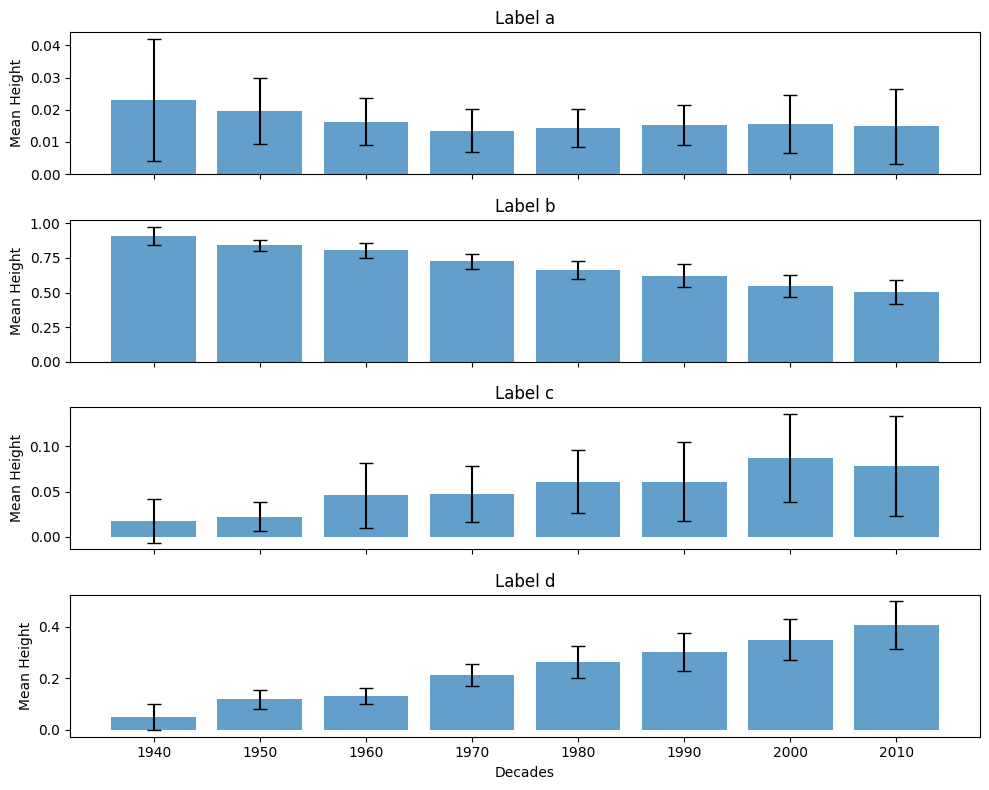

In [8]:
import matplotlib.pyplot as plt
import numpy as np

decades = decades_labels

# Convert decades to string for plotting purposes
decades = [str(decade) for decade in decades]

# Unique labels
unique_labels = sorted(set(labels))
num_labels = len(unique_labels)

# Create subplots for each label
fig, axes = plt.subplots(nrows=num_labels, ncols=1, figsize=(10, 8), sharex=True)

# Plotting each label separately
for i, label in enumerate(unique_labels):
    label_data = [(decades[j], mean_heights[j]) for j in range(len(labels)) if labels[j] == label]
    x_values = [data_point[0] for data_point in label_data]
    y_values = [data_point[1] for data_point in label_data]
    y_err = [std_devs[j] for j in range(len(labels)) if labels[j] == label]

    ax = axes[i]
    ax.bar(x_values, y_values, yerr=y_err, align='center', alpha=0.7, ecolor='black', capsize=5)
    ax.set_ylabel('Mean Height')
    ax.set_title(f'Label {label}')

# Add shared X-axis label and adjust layout
plt.xlabel('Decades')
plt.tight_layout()
plt.show()

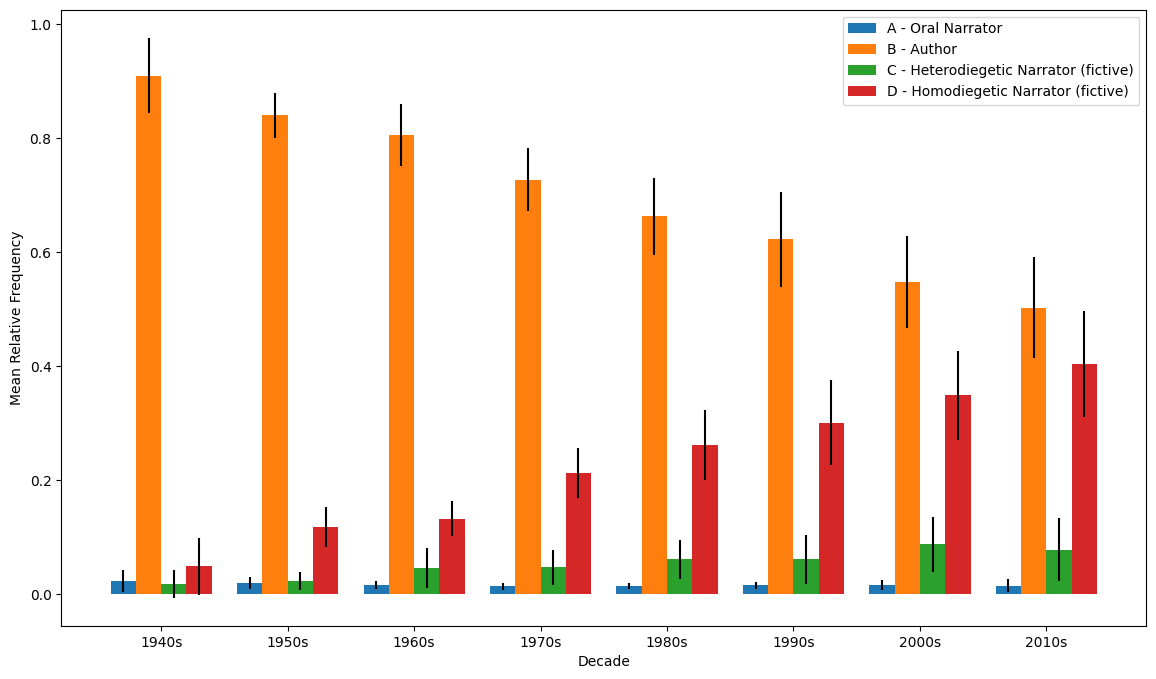

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the data into a pandas DataFrame
data = {
    "decade": decades_labels,
    "label": labels,
    "mean": mean_heights,
    "stddev": std_devs
}

df = pd.DataFrame(data)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define the number of groups and the bar width
n_decades = df['decade'].nunique()
bar_width = 0.2

# Create an array with the positions of the bars on the x-axis
decades = df['decade'].unique()
indices = np.arange(n_decades)

# Custom labels for the legend
custom_labels = ["A - Oral Narrator", "B - Author", "C - Heterodiegetic Narrator (fictive)", "D - Homodiegetic Narrator (fictive)"]

# Plotting each label
labels = df['label'].unique()
for i, label in enumerate(labels):
    subset = df[df['label'] == label]
    means = subset['mean']
    stddevs = subset['stddev']
    ax.bar(indices + i * bar_width, means, bar_width, yerr=stddevs, label=custom_labels[i])


# Adding labels, title and legend
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Relative Frequency')
ax.set_title('')#Relative Distribution of Narrator Senses with Stddev Error')
ax.set_xticks(indices + bar_width / 2 * (len(labels) - 1))
ax.set_xticklabels([str(decade) + 's' for decade in decades])
ax.legend()

# Save the plot at 600 DPI with bounding box
fig.savefig('stacked_bar_chart_600dpi_largescale_abcd.png', dpi=600, bbox_inches='tight')

plt.show()

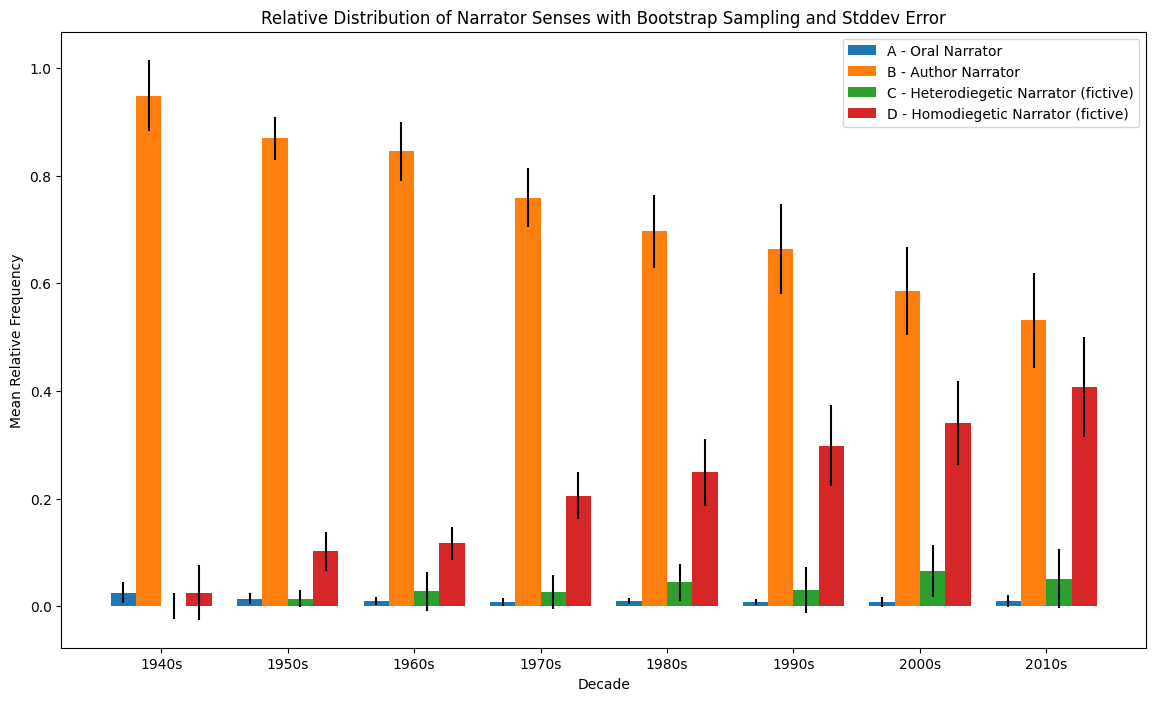

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the data into a pandas DataFrame
data = {
    "decade": m10_decades_labels,
    "label": m10_labels,
    "mean": m10_mean_heights,
    "stddev": std_devs
}

df = pd.DataFrame(data)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define the number of groups and the bar width
n_decades = df['decade'].nunique()
bar_width = 0.2

# Create an array with the positions of the bars on the x-axis
decades = df['decade'].unique()
indices = np.arange(n_decades)

# Custom labels for the legend
custom_labels = ["A - Oral Narrator", "B - Author Narrator", "C - Heterodiegetic Narrator (fictive)", "D - Homodiegetic Narrator (fictive)"]

# Plotting each label
labels = df['label'].unique()
for i, label in enumerate(labels):
    subset = df[df['label'] == label]
    means = subset['mean']
    stddevs = subset['stddev']
    ax.bar(indices + i * bar_width, means, bar_width, yerr=stddevs, label=custom_labels[i])


# Adding labels, title and legend
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Relative Frequency')
ax.set_title('Relative Distribution of Narrator Senses with Bootstrap Sampling and Stddev Error')
ax.set_xticks(indices + bar_width / 2 * (len(labels) - 1))
ax.set_xticklabels([str(decade) + 's' for decade in decades])
ax.legend()

plt.show()